In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [29]:
data = pd.DataFrame([
    ['Sunny', 'Hot', 'High', 'False', 'No'],
    ['Sunny', 'Hot', 'High', 'True', 'No'],
    ['Overcast', 'Hot', 'High', 'False', 'Yes'],
    ['Rain', 'Mild', 'High', 'False', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'False', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'True', 'No'],
    ['Overcast', 'Cool', 'Normal', 'True', 'Yes'],
    ['Sunny', 'Mild', 'High', 'False', 'No'],
    ['Sunny', 'Cool', 'Normal', 'False', 'Yes'],
    ['Rain', 'Mild', 'Normal', 'False', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'True', 'Yes'],
    ['Overcast', 'Mild', 'High', 'True', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'False', 'Yes'],
    ['Rain', 'Mild', 'High', 'True', 'No']
], columns=['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'])

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Windy <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Windy >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- Windy >  0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1



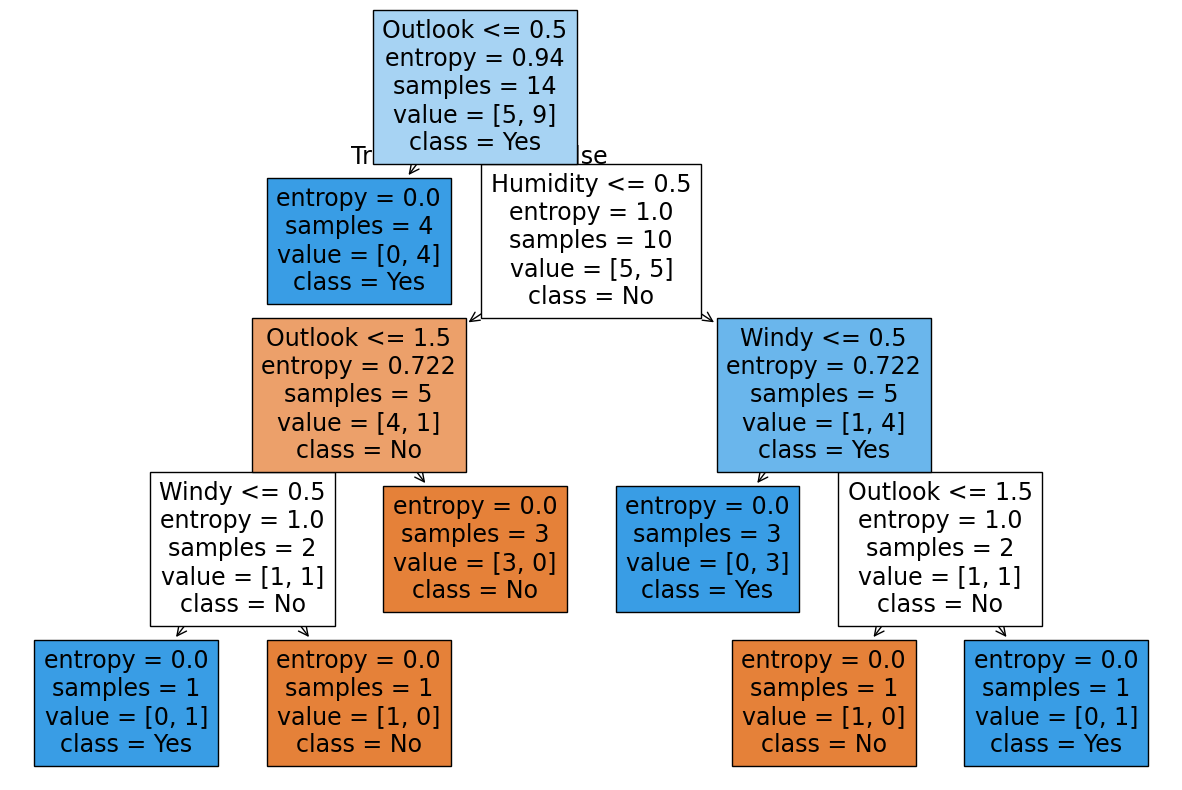

In [30]:
label_encoders = {}
for col in data.columns:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col] = le # Store the fitted encoder if needed later

x = data.drop('Play', axis=1)
y = data['Play']

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x, y)

print(export_text(clf, feature_names=list(x.columns)))

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=list(x.columns), class_names=['No', 'Yes'], filled=True)
plt.show()